## Лабораторная работа 2. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

### Правила сдачи
Выполненную работу следует отправить в систему Anytask.

### Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучение (train) и тест (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму в оценке модели на тесте. И наоборот, большой размер тестовой выборки ведет к менее шумной оценке качества, однако модели получаются менее точными.

Многие модели классификации получают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). Затем принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$$y(x) = 
\begin{cases}
+1, &\text{если} \; \tilde{y}(x) \geq \theta \\
-1, &\text{если} \; \tilde{y}(x) < \theta
\end{cases}
$$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения лабораторной не требуется.

### Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, регуляризация в линейной модели или максимальная глубина решающего дерева). Каждая модель обычно имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать: 

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (`train`), валидация (`validation`) и тест (`test`). Валидационную подвыборку используют для сравнения моделей, а `test` — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH) . Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, надо не забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

### Задание

В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, learning_curve

%matplotlib inline

data = pd.read_csv('data.adult.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


Иногда в данных встречаются пропуски. Как задаются пропуски обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "?". 

**(0.5 балла)** Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 
 - Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.
 - Выделите целевую переменную (ту, которую мы хотим предсказывать) в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату (то есть выделите столбец с целевыми значниями и преобразуйте его в столбец нулей и единиц).
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [2]:
integral = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
non_integral = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

for feature in integral:
    data = data[~np.isnan(data[feature])]

for feature in non_integral:
    data = data[data[feature] != '?']

y = data['>50K,<=50K'].map(lambda x: 0 if x == '<=50K' else 1)
X = data.drop('>50K,<=50K', axis=1)
X_integral = X[integral]
X_integral.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,284843,9,594,0,60
1,40,190290,10,0,0,40
2,36,177858,13,0,0,40
3,22,184756,10,0,0,30
4,47,149700,13,15024,0,40


### 1. Обучение классификаторов на вещественных признаках (4 балла)

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.
В начале посмотрим, как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


#### 1.1. Подбор одного гиперпараметра (1.5 балла)



Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)
 
Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV.

![](https://i.stack.imgur.com/YWgro.gif)



Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. 

(значение качества на каждом фолде, среднее значение качества и много другой полезной информации можно получить из поля [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV))

Что вы можете сказать о получившихся графиках? У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

In [3]:
def plot_params_score(optimizer):
    res = optimizer.cv_results_
    param_name = list(res['params'][0].keys())[0]
    params = list(map(lambda x: x[param_name], res['params']))

    means = np.zeros(len(params))
    stds = np.zeros(len(params))
    for i, param in enumerate(params):
        scores = []
        for split_number in range(5):
            scores.append(res[f'split{split_number}_test_score'][i])
        means[i] = np.mean(scores)
        stds[i] = np.std(scores)

    plt.errorbar(range(len(params)), means, xerr=0.5, yerr=2*stds, linestyle='', fmt='o')
    plt.xticks(range(len(params)), params, rotation='vertical')
    plt.xlabel(param_name)
    plt.ylabel('score')
    plt.show()

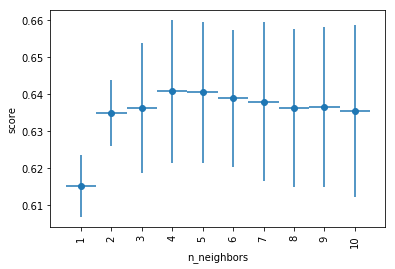

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=4, p=2,
            weights='uniform'), 0.64071605287085742)

In [4]:
grid = {'n_neighbors': list(range(1, 11))}
optimizer = GridSearchCV(KNeighborsClassifier(), grid, cv=5, return_train_score=True, scoring='roc_auc')
optimizer.fit(X_integral, y)
plot_params_score(optimizer)
optimizer.best_estimator_, optimizer.best_score_

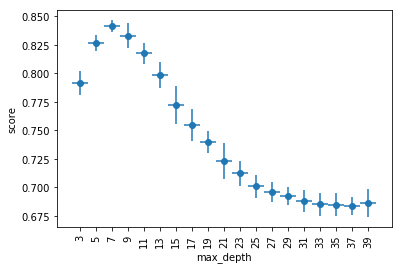

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=42,
             splitter='best'), 0.84143462745769326)

In [5]:
grid = {'max_depth': list(range(3, 40, 2))}
optimizer = GridSearchCV(DecisionTreeClassifier(random_state=42), grid, cv=5, return_train_score=True, scoring='roc_auc')
optimizer.fit(X_integral, y)
optimizer.best_estimator_
plot_params_score(optimizer)
optimizer.best_estimator_, optimizer.best_score_

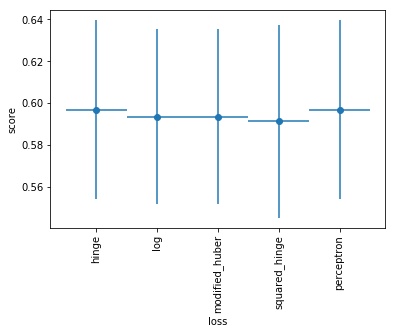

(SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
        n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
        tol=None, verbose=0, warm_start=False), 0.59675804674620869)

In [6]:
grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']}

# C:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters ha
# ve been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they defau
# lt to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 10
# 00, and default tol will be 1e-3.
#   "and default tol will be 1e-3." % type(self), FutureWarning)

# use explicit max_iter=5 and tol=None to remove the above deprecation warning
optimizer = GridSearchCV(SGDClassifier(random_state=42, max_iter=5, tol=None), grid, cv=5,
                         return_train_score=True, scoring='roc_auc')
optimizer.fit(X_integral, y)
plot_params_score(optimizer)
optimizer.best_estimator_, optimizer.best_score_

Наибольшее среднее значение качества получилось у дерева решений с `max_depth=7`, наибольший доверительный интервал - у SGDClassifier'а с `loss='squared_hinge'`

**Количество деревьев в Random Forest**

Выберите какое-нибудь значение для числа деревьев n_estimators (не очень маленькое, но и не огромное, чтобы достаточно быстро обучаться: в дальнейшем мы будем обучать алгоритм, перебирая параметры по сетке).  

В общем случае параметр число деревьев (*n_estimators*) в алгоритме RandomForest подбирается следующим образом. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев. Подберите количество деревьев, начиная с которого качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества деревьев разных размеров, состоящих из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). Применить класс GridSearchCV в данном задании затруднительно, поэтому предлагается самостоятельно написать цикл по числу деревьев.

Пример кода есть в ноутбуке RandomForest  с семинара (функция *get_mse_list*). 
Постройте график, и вы увидите, начиная с какого значения n_estimators качество на кросс-валидации стабилизируется. Если на графике этого не видно, значит, исходное максимальное значение n_estimators было слишком маленьким, и стоит его увеличить. 


Однако, поскольку подобная процедура предстоит также после подбора важных параметров (после пункта 1.3), часто, чтобы не делать одно и то же два раза, изначально выбирают n_estimators, исходя из опыта, просто какое-то немаленькое число: 100, 500, 1000, ...    
Как поступить вам - решайте сами. 
Либо вы реализуете подбор n_estimators два раза: до подбора *max_features* и *min_samples_leaf* и после подбора, либо только один раз после подбора.  Плюс второго подхода: пишите меньше кода, плюс первого подхода: до начала подбора гиперпараметров вы можете существенно уменьшить число деревьев, уменьшая, тем самым, время подбора гиперпараметров. 

 Обучите RandomForest с выбранным числом деревьев. Проверьте качество по кросс-валидации.

In [7]:
from sklearn.metrics import mean_squared_error as mse

def get_scores_list(X, y, clf, score, print_train=True):
    predictions = list()
    scores = list()
    for i, tree in enumerate(clf.estimators_):
        predictions.append(tree.predict(X))
        rf_prediction = np.mean(predictions, axis=0)
        scores.append(score(y, rf_prediction))
    if print_train:
        print('Last score', scores[-1])
    return scores

def plot_score_graph(clf, X_train, X_test, y_train, y_test, score, print_train=True):
    clf.fit(X_train, y_train)
    train_mses = get_scores_list(X_train, y_train, clf, score, False)
    test_mses = get_scores_list(X_test, y_test, clf, score)
    if print_train:
        plt.plot(train_mses, label='train set score')
    plt.plot(test_mses, label='test set score')
    plt.xlabel('n_estimators')
    plt.ylabel('score')
    plt.legend()

Last score 0.813334639967


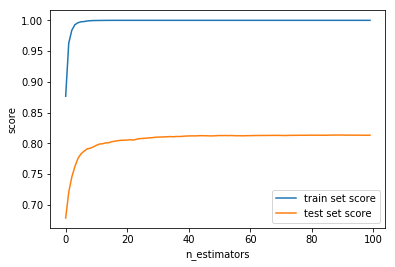

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_integral, y, test_size=0.9, random_state=1543)
plot_score_graph(RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
                 X_train, X_test, y_train, y_test, roc_auc_score)

Видно, что после 50 деревьев оценка почти не растет.

In [9]:
clf = RandomForestClassifier(n_estimators=50, random_state=42)
cross_val_score(clf, X_integral, y, cv=5, scoring='roc_auc').mean()

0.81349146709070053

#### 1.2. Масштабирование (0.5 балла)

При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество давайте посмотрим на значения самих признаков.

Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*. Глядя на получившиеся графики, скажите в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масшитабирование повлиять на работу этих алгоритмов?

(array([ 2466.,  2776.,  2966.,  3066.,  1931.,  1203.,   667.,   183.,
           62.,    27.]),
 array([ 17. ,  24.3,  31.6,  38.9,  46.2,  53.5,  60.8,  68.1,  75.4,
         82.7,  90. ]),
 <a list of 10 Patch objects>)

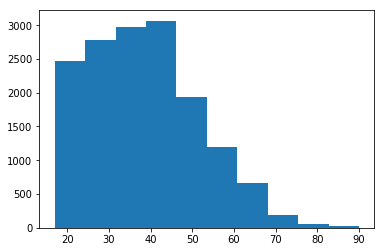

In [10]:
plt.hist(X_integral['age'])

(array([  6.68100000e+03,   6.86300000e+03,   1.52800000e+03,
          2.15000000e+02,   4.40000000e+01,   4.00000000e+00,
          6.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          3.00000000e+00]),
 array([   19302. ,   165842.3,   312382.6,   458922.9,   605463.2,
          752003.5,   898543.8,  1045084.1,  1191624.4,  1338164.7,
         1484705. ]),
 <a list of 10 Patch objects>)

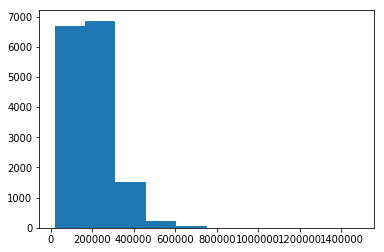

In [11]:
plt.hist(X_integral['fnlwgt'])

0        14019
15024      178
7688       144
7298       134
99999       66
3103        50
5178        50
4386        43
5013        42
2174        28
Name: capital-gain, dtype: int64

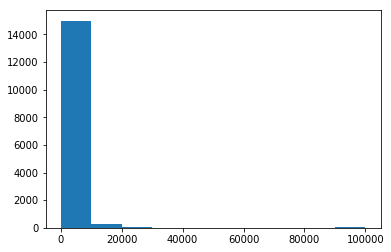

In [12]:
plt.hist(X_integral['capital-gain'])
X_integral['capital-gain'].value_counts()[:10]

Данные неоднородны. Возраст варьируется от 20 до 90, `fnlwgt` - примерно от 0 до 1400000, `capital-gain` - от 0 (самое часто встречаемое значение) до 100000. Самое большое влияние это оказывает на метод ближайших соседей, так как большая разница между признаком `fnlwgt` для двух объектов значительно отдаляет их друг от друга, при этом, возможно, признак `fnlwgt` - не самый важный из имеющихся, поэтому для метода ближайших соседей признаки нужно смасштабировать. Для SGDClassifier'а тоже нужно масштабирование, так как признак с большим разбросом будет оказывать большее влияние при подсчете расстояния.

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 
Масштабируйте все вещественные признаки одним (любым на Ваш выбор) из указанных способов и подберите оптимальные значения гиперпараметров аналогичо пункту выше.

Изменилось ли качество у некоторых алгоритмов и почему?

In [13]:
scaler = StandardScaler()
X_int_scaled = scaler.fit_transform(X_integral)
X_int_scaled = pd.DataFrame(X_int_scaled, index=X_integral.index, columns=X_integral.columns)

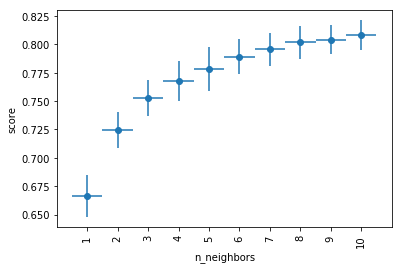

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=10, p=2,
            weights='uniform'), 0.80831854487443477)

In [14]:
grid = {'n_neighbors': list(range(1, 11))}
optimizer = GridSearchCV(KNeighborsClassifier(), grid, cv=5, return_train_score=True, scoring='roc_auc')
optimizer.fit(X_int_scaled, y)
plot_params_score(optimizer)
optimizer.best_estimator_, optimizer.best_score_

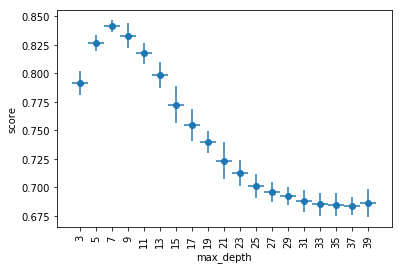

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=42,
             splitter='best'), 0.84148090978860723)

In [15]:
grid = {'max_depth': list(range(3, 40, 2))}
optimizer = GridSearchCV(DecisionTreeClassifier(random_state=42), grid, cv=5, return_train_score=True, scoring='roc_auc')
optimizer.fit(X_int_scaled, y)
optimizer.best_estimator_
plot_params_score(optimizer)
optimizer.best_estimator_, optimizer.best_score_

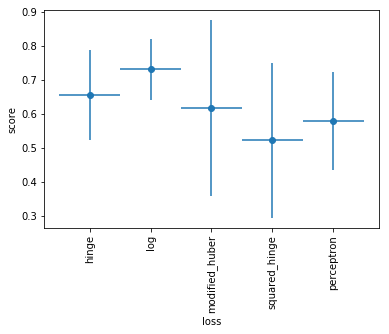

(SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='log', max_iter=5, n_iter=None,
        n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
        tol=None, verbose=0, warm_start=False), 0.73129931188182273)

In [16]:
grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']}

optimizer = GridSearchCV(SGDClassifier(random_state=42, max_iter=5, tol=None), grid, cv=5,
                         return_train_score=True, scoring='roc_auc')
optimizer.fit(X_int_scaled, y)
plot_params_score(optimizer)
optimizer.best_estimator_, optimizer.best_score_

Last score 0.81317948062


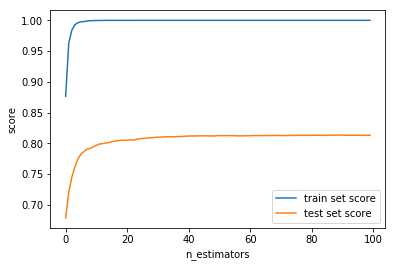

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_int_scaled, y, test_size=0.9, random_state=1543)
plot_score_graph(RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
                 X_train, X_test, y_train, y_test, roc_auc_score)

In [18]:
clf = RandomForestClassifier(n_estimators=50, random_state=42)
cross_val_score(clf, X_int_scaled, y, cv=5, scoring='roc_auc').mean()

0.81343376218086072

Видно, что качество у метода ближайших соседей и SVM значительно улучшилось, а у DecisionTree и RandomForest почти не изменилось. Это происходит из-за того, что признаки с большим разбросом вносят больший вклад в расстояние между объектами, что влияет на работу метода ближайших соседей и SVM.

#### 1.3. Подбор нескольких гиперпараметров (1 балл)
Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и минимальное число объектов обучающей выборки в листе (*min_samples_leaf*)
 - RandomForest — *max_features* и минимальное число объектов обучающей выборки в листе (*min_samples_leaf*) (при фиксированном количестве деревьев, найденном ранее)
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*

Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели"

Какой из алгоритмов имеет наилучшее качество? 

In [19]:
grid = {
    'n_neighbors': list(range(1, 11)),
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

knn_optimizer = GridSearchCV(KNeighborsClassifier(), grid, cv=5,
                             return_train_score=True, scoring='roc_auc', n_jobs=-1, verbose=1)
knn_optimizer.fit(X_int_scaled, y)
knn_optimizer.best_estimator_, knn_optimizer.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   23.7s finished


(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
            metric_params=None, n_jobs=1, n_neighbors=10, p=2,
            weights='uniform'), 0.81260659243615907)

In [20]:
grid = {'max_depth': list(range(3, 40, 2)), 'min_samples_leaf': list(range(1, 10))}
tree_optimizer = GridSearchCV(DecisionTreeClassifier(random_state=42), grid, cv=5,
                              return_train_score=True, scoring='roc_auc', n_jobs=-1, verbose=1)
tree_optimizer.fit(X_int_scaled, y)
tree_optimizer.best_estimator_, tree_optimizer.best_score_

Fitting 5 folds for each of 171 candidates, totalling 855 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 855 out of 855 | elapsed:   10.2s finished


(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=42,
             splitter='best'), 0.84409953178671504)

In [21]:
grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['none', 'l2', 'l1', 'elasticnet']
}

sgd_optimizer = GridSearchCV(SGDClassifier(random_state=42, max_iter=5, tol=None), grid, cv=5,
                             return_train_score=True, scoring='roc_auc')
sgd_optimizer.fit(X_int_scaled, y)
sgd_optimizer.best_estimator_, sgd_optimizer.best_score_

(SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='log', max_iter=5, n_iter=None,
        n_jobs=1, penalty='l1', power_t=0.5, random_state=42, shuffle=True,
        tol=None, verbose=0, warm_start=False), 0.78659814343726209)

In [22]:
grid = {
    'max_features': [None, 'log2', 'sqrt', 0.7, 0.5, 0.8, 3, 5],
    'min_samples_leaf': list(range(1, 11)) + [0.1, 0.3, 0.5]
}

rf_optimizer = GridSearchCV(RandomForestClassifier(random_state=42, n_estimators=50), grid, cv=5,
                            return_train_score=True, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_optimizer.fit(X_int_scaled, y)
rf_optimizer.best_estimator_, rf_optimizer.best_score_

Fitting 5 folds for each of 104 candidates, totalling 520 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 520 out of 520 | elapsed:   58.9s finished


(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=9, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
             oob_score=False, random_state=42, verbose=0, warm_start=False),
 0.852153545563054)

Наилучшее качество имеет случайный лес с `max_features='log2'` и `min_samples_leaf=9`

Сравните алгоритмы с точки зрения времени обучения. Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

(hint: [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) подсчитывает не только качество на кросс-валидации, но и время работы алгоритмов)

In [23]:
print('knn', np.mean(knn_optimizer.cv_results_['mean_fit_time']))
print('tree', np.mean(tree_optimizer.cv_results_['mean_fit_time']))
print('sgd', np.mean(sgd_optimizer.cv_results_['mean_fit_time']))
print('rf', np.mean(rf_optimizer.cv_results_['mean_fit_time']))

knn 0.158020269076
tree 0.0370024820517
sgd 0.0067200922966
rf 0.71233295294


Дольше всего работает обучение RandomForest, так как для него нужно обучить 50 деревьев (было бы больше, если бы мы не подобрали оптимальное количество деревьев выше).

Теперь подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев. Подберите количество деревьев, начиная с которого качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества деревьев разных размеров, состоящих из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)).

Применить класс GridSearchCV в данном задании затруднительно, поэтому предлагается самостоятельно написать цикл по числу деревьев.

**Важно:**  мы подбираем n_estimators при фиксированных, найденных ранее, значениях параметров *max_features* и *min_samples_leaf*.

Last score 0.827861549063


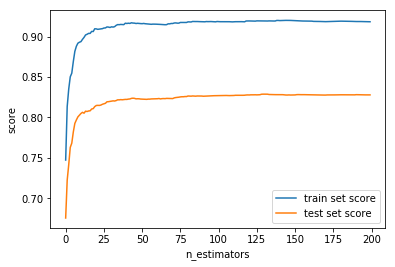

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_int_scaled, y, test_size=0.9, random_state=1543)
plot_score_graph(RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42, max_features='log2', min_samples_leaf=9),
                 X_train, X_test, y_train, y_test, roc_auc_score)

In [25]:
clf = RandomForestClassifier(n_estimators=50, random_state=42, max_features='log2', min_samples_leaf=9)
cross_val_score(clf, X_int_scaled, y, cv=5, scoring='roc_auc').mean()

0.85215345198274817

#### 1.4. Выводы (1 балл)
Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?
* Для каких целей можно использовать знание качества на обучающей части выборки?
* Какой из алгоритмов лучше обучается на меньшем числе объектов?
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

In [26]:
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=1,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

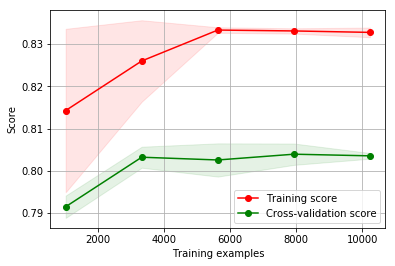

In [27]:
plot_learning_curve(KNeighborsClassifier(metric='manhattan', n_neighbors=10), X_int_scaled, y)

<module 'matplotlib.pyplot' from 'C:\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

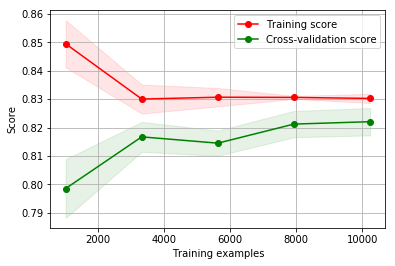

In [28]:
plot_learning_curve(DecisionTreeClassifier(random_state=42, max_depth=7, min_samples_leaf=4), X_int_scaled, y)

<module 'matplotlib.pyplot' from 'C:\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

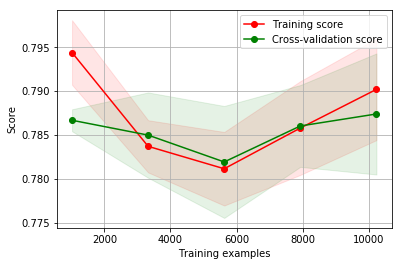

In [51]:
plot_learning_curve(SGDClassifier(random_state=42, max_iter=5, tol=None, loss='log', penalty='l1'), X_int_scaled, y)

<module 'matplotlib.pyplot' from 'C:\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

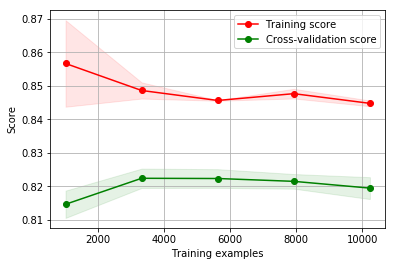

In [30]:
plot_learning_curve(RandomForestClassifier(n_estimators=50, random_state=42, max_features='log2', min_samples_leaf=9), X_int_scaled, y)

Качество на обучающей выборке может убывать с ростом числа объектов, так как под небольшое число объектов можно легко подстроиться. Качество на тестовой выборке также может уменьшаться с ростом числа объектов. Возможно, это происходит из-за неравномерного распределения объектов, в результате которого с ростом числа объектов добавляютя объекты с признаками, на которых классификатор чаще ошибается. Или это может свидетельствовать о переобучении.

Знание качества на обучающей выборке можно использовать, чтобы понять, не переобучился ли алгоритм (например, если качество очень большое).

Судя по графикам, на меньшем числе объектов лучше обучается SGDClassifier. Также по графику видно, что с ростом числа объектов у него увеличивается доверительный интервал.

По графикам видно, что для всех алгоритмов, кроме SGD, произошло насыщение. Для SGD возможно повышение качества при увеличении количества объектов.

### 2. Добавление категориальных признаков в модели (1 балл)

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn).

In [31]:
X_int_cat = X_int_scaled.copy()
X_int_cat.reset_index(drop=True, inplace=True)
for column in non_integral:
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(data[column])
    integer_encoded = integer_encoded.reshape(-1, 1)
    
    one_hot = OneHotEncoder(sparse=False)
    one_hot_encoded = one_hot.fit_transform(integer_encoded)
    
    labels = data[column].sort_values().unique()
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=labels).add_prefix(f'{column}_')

    X_int_cat = pd.concat([X_int_cat, one_hot_df], axis=1)

X_int_cat.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,-0.342919,0.900258,-0.450788,-0.065600,-0.21874,1.588223,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.114760,0.010683,-0.059086,-0.150439,-0.21874,-0.074178,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.190359,-0.106280,1.116020,-0.150439,-0.21874,-0.074178,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-1.258276,-0.041382,-0.059086,-0.150439,-0.21874,-0.905379,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.648719,-0.371197,1.116020,1.995391,-0.21874,-0.074178,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Так как после кодирования признаков получилось достаточно много, в этой работе мы не будем добавлять их и подбирать заново оптимальные гиперпараметры (хотя правильнее было бы это сделать). 

Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

In [32]:
clf = KNeighborsClassifier(n_neighbors=10, metric='manhattan')
cross_val_score(clf, X_int_cat, y, cv=5, scoring='roc_auc').mean()

0.87412769429170756

In [33]:
clf = DecisionTreeClassifier(random_state=42, max_depth=7, min_samples_leaf=4)
cross_val_score(clf, X_int_cat, y, cv=5, scoring='roc_auc').mean()

0.89358790212003714

In [34]:
clf = SGDClassifier(random_state=42, max_iter=5, tol=None, loss='log', penalty='l1')
cross_val_score(clf, X_int_cat, y, cv=5, scoring='roc_auc').mean()

0.87935134086628486

In [35]:
clf = RandomForestClassifier(n_estimators=50, random_state=42, max_features='log2', min_samples_leaf=9)
cross_val_score(clf, X_int_cat, y, cv=5, scoring='roc_auc').mean()

0.90901092074037027

Качество заметно выросло, наилучший классификатор - все так же случайный лес.

### 3. Смешивание моделей - blending (1.5 балла)

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказани путем смешивания подобных разных моделей. Давайте посмотрим, действительно ли это дает прирост в качестве.

Выберете из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

#### 3.1. Реализация класса (1 балл)
При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель, например, класс *GridSearchCV*, *learning_curve* и другие.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

In [36]:
class BlendingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, clf1, clf2, alpha=0.5):
        self.clf1 = clf1
        self.clf2 = clf2
        self.alpha = alpha
    
    def fit(self, X, y):
        self.clf1.fit(X, y)
        self.clf2.fit(X, y)
        return self
    
    def predict(self, X):
        clf1_pred = self.clf1.predict(X)
        clf2_pred = self.clf2.predict(X)
        return clf1_pred*self.alpha + clf2_pred*(1 - self.alpha)
    
    def predict_proba(self, X):
        clf1_pred_proba = self.clf1.predict_proba(X)
        clf2_pred_proba = self.clf2.predict_proba(X)
        return clf1_pred_proba*self.alpha + clf2_pred_proba*(1 - self.alpha)

#### 3.2. Подбор $\alpha$ (0.5 балла) 
Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. 
Поскольку на обучающей выборе алгоритмы обычно дают более хорошее предсказание, чем на тестовой выборке, то $\alpha$ корректно подбирать, используя предсказания именно на тестовой выборке, а не на обучающей. Чтобы получить предсказания для каждого объекта как если бы он был в тестовой выборке, используйте 5-Fold CV — $clf_1$ и $clf_2$.
Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.


Out-of-fold предсказания можно получить, например, с помощью [cross_val_predict](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) в sklearn.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

In [41]:
def plot_params_score(alphas, scores):
    means = np.zeros(len(scores))
    stds = np.zeros(len(scores))
    for i, score in enumerate(scores):
        means[i] = np.mean(score)
        stds[i] = np.std(score)

    plt.errorbar(range(len(scores)), means, xerr=0.5, yerr=2*stds, linestyle='', fmt='o')
    plt.xticks(range(len(scores)), alphas, rotation='vertical')
    plt.xlabel('alpha')
    plt.ylabel('score')
    plt.show()

alpha: 0.1, score: 0.9056477018402479
alpha: 0.2, score: 0.907129287163713
alpha: 0.30000000000000004, score: 0.9084262694363883
alpha: 0.4, score: 0.9094331121342834
alpha: 0.5, score: 0.9102353777250519
alpha: 0.6000000000000001, score: 0.9108342895459561
alpha: 0.7000000000000001, score: 0.9111149243524105
alpha: 0.8, score: 0.9110010689985095
alpha: 0.9, score: 0.9103475379408478


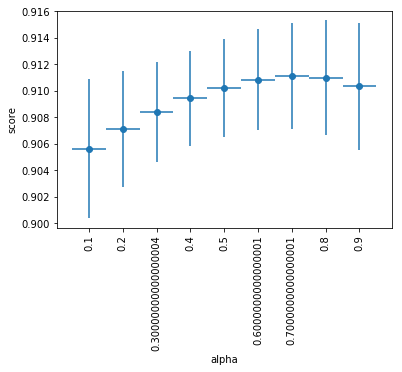

In [43]:
clf1 = RandomForestClassifier(n_estimators=50, random_state=42, max_features='log2', min_samples_leaf=9)
clf2 = DecisionTreeClassifier(random_state=42, max_depth=7, min_samples_leaf=4)
alphas = list(map(lambda i: i*0.1, range(1, 10)))
scores = [0]*len(alphas)
for i, alpha in enumerate(alphas):
    blending = BlendingClassifier(clf1, clf2, alpha)
    scores[i] = cross_val_score(blending, X_int_cat, y, cv=5, scoring='roc_auc')
    print(f'alpha: {alpha}, score: {scores[i].mean()}')
plot_params_score(alphas, scores)

Блендинг дал прирост к качеству из-за того, что классификаторы могли ошибаться на разных ответах и поправлять ошибки друг друга.